# Machine Learning Modelling

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./data/Cleaned_data.csv')

In [3]:
data.sort_values(by='Zipcode')

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
9237,MA,Amherst,Sunderland Rd,1002,4.0,3.0,3120.0,181.089744,2.700000,526800.000000,3499.0,42.422096,-72.538150,565000.0
8926,MA,Belchertown,Gold St,1007,3.0,2.0,1296.0,270.061728,1.730000,355000.000000,2949.0,42.342020,-72.410630,350000.0
8804,MA,Belchertown,Mill Valley Rd,1007,3.0,2.0,1512.0,210.978836,1.760000,324600.000000,2274.0,42.263100,-72.374750,319000.0
8812,MA,Chester,Maple St,1011,5.0,2.0,2136.0,46.816479,0.450000,88900.000000,2800.0,42.278910,-72.979530,100000.0
8915,MA,Chicopee,Fairmont St,1013,2.0,1.0,1008.0,237.996032,0.511387,242000.000000,1800.0,42.185658,-72.598274,239900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,AK,Ketchikan,Schoenbar Rd,99901,4.0,3.0,2112.0,233.428030,0.340000,475400.000000,1949.0,55.347317,-131.637570,493000.0
516,AK,Coffman Cove,Coho Dr,99918,3.0,3.0,1850.0,539.459459,0.400000,942680.641922,2585.0,56.021515,-132.827740,998000.0
685,AK,Coffman Cove,NE Minke,99918,1.0,1.0,1200.0,290.833333,3.900000,346900.000000,1900.0,56.012170,-132.810640,349000.0
751,AK,Wrangell,.2 Mile Zimovia Hwy,99929,3.0,2.0,1800.0,206.666667,0.980000,370600.000000,2500.0,56.363064,-132.356580,372000.0


## *Feature Engineering*

In [4]:
data.isna().sum()

State             0
City              0
Street            0
Zipcode           0
Bedroom           0
Bathroom          0
Area              0
PPSq              0
LotArea           0
MarketEstimate    0
RentEstimate      0
Latitude          0
Longitude         0
ListedPrice       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21745 entries, 0 to 21744
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           21745 non-null  object 
 1   City            21745 non-null  object 
 2   Street          21745 non-null  object 
 3   Zipcode         21745 non-null  int64  
 4   Bedroom         21745 non-null  float64
 5   Bathroom        21745 non-null  float64
 6   Area            21745 non-null  float64
 7   PPSq            21745 non-null  float64
 8   LotArea         21745 non-null  float64
 9   MarketEstimate  21745 non-null  float64
 10  RentEstimate    21745 non-null  float64
 11  Latitude        21745 non-null  float64
 12  Longitude       21745 non-null  float64
 13  ListedPrice     21745 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
def split_zipcode(zipcode):
    str_zip = str(zipcode).zfill(5)
    return [int(str_zip[0]), int(str_zip[1]), int(str_zip[2]), int(str_zip[3]), int(str_zip[4])]

In [7]:
zipcode_components = data['Zipcode'].apply(split_zipcode)
zipcode_df = pd.DataFrame(zipcode_components.tolist(), columns=['NationalArea', 'CityPO1', 'CityPO2', 'AssociatePO1', 'AssociatePO2'])

df = pd.concat([data, zipcode_df], axis=1)

In [11]:
df.sort_values(by='Zipcode')

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice,NationalArea,CityPO1,CityPO2,AssociatePO1,AssociatePO2
9237,MA,Amherst,Sunderland Rd,1002,4.0,3.0,3120.0,181.089744,2.700000,526800.000000,3499.0,42.422096,-72.538150,565000.0,0,1,0,0,2
8926,MA,Belchertown,Gold St,1007,3.0,2.0,1296.0,270.061728,1.730000,355000.000000,2949.0,42.342020,-72.410630,350000.0,0,1,0,0,7
8804,MA,Belchertown,Mill Valley Rd,1007,3.0,2.0,1512.0,210.978836,1.760000,324600.000000,2274.0,42.263100,-72.374750,319000.0,0,1,0,0,7
8812,MA,Chester,Maple St,1011,5.0,2.0,2136.0,46.816479,0.450000,88900.000000,2800.0,42.278910,-72.979530,100000.0,0,1,0,1,1
8915,MA,Chicopee,Fairmont St,1013,2.0,1.0,1008.0,237.996032,0.511387,242000.000000,1800.0,42.185658,-72.598274,239900.0,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,AK,Ketchikan,Schoenbar Rd,99901,4.0,3.0,2112.0,233.428030,0.340000,475400.000000,1949.0,55.347317,-131.637570,493000.0,9,9,9,0,1
516,AK,Coffman Cove,Coho Dr,99918,3.0,3.0,1850.0,539.459459,0.400000,942680.641922,2585.0,56.021515,-132.827740,998000.0,9,9,9,1,8
685,AK,Coffman Cove,NE Minke,99918,1.0,1.0,1200.0,290.833333,3.900000,346900.000000,1900.0,56.012170,-132.810640,349000.0,9,9,9,1,8
751,AK,Wrangell,.2 Mile Zimovia Hwy,99929,3.0,2.0,1800.0,206.666667,0.980000,370600.000000,2500.0,56.363064,-132.356580,372000.0,9,9,9,2,9


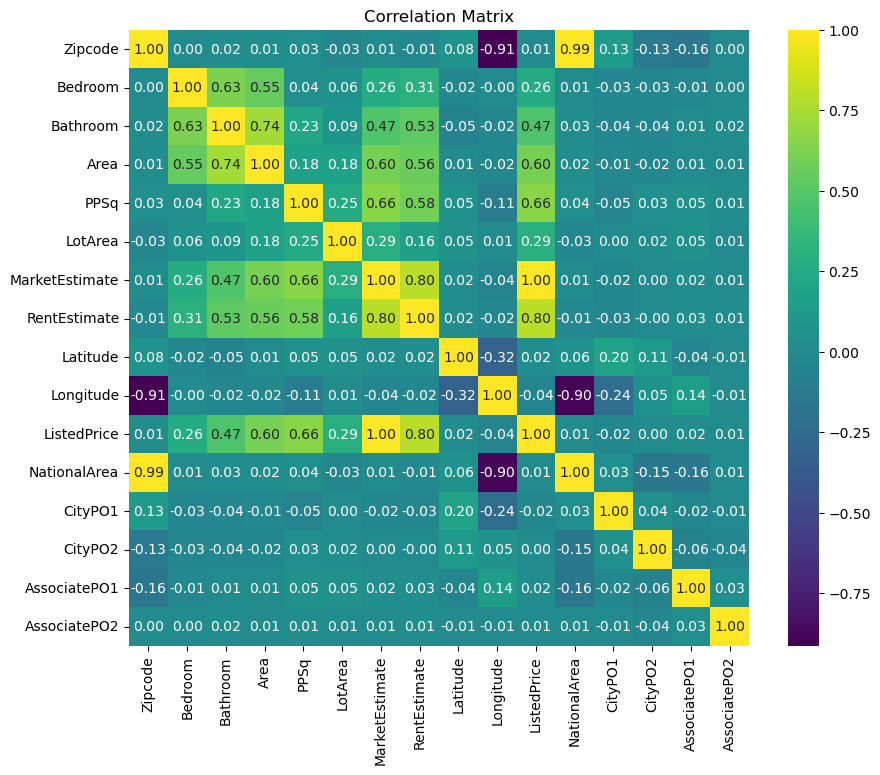

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_cols = df.select_dtypes(include=['float64','int64'])
correlation_matrix = corr_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [64]:
#Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [ ]:
MarketEstimate,PPSq,Area,Bathroom,LotArea,Bedroom,Latitude,Longitude, NationalArea, CityPO1, cityPO2, AssociatePO1, AssociatePO2

In [31]:
features = df[['Bedroom', 'Bathroom', 'Area', 'PPSq', 'MarketEstimate', 'Longitude', 'Latitude', 'Zipcode']]

scaler = MinMaxScaler()
features[features.columns] = scaler.fit_transform(features[features.columns])

C:\Users\jeeva\AppData\Local\Temp\ipykernel_9444\3810234619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[features.columns] = scaler.fit_transform(features[features.columns])


In [32]:
features

,Bedroom,Bathroom,Area,PPSq,MarketEstimate,Longitude,Latitude,Zipcode
0,0.190476,0.08,0.014959,0.023991,0.003424,0.777536,0.135618,0.359472
1,0.142857,0.08,0.016822,0.023297,0.003863,0.782978,0.129821,0.359431
2,0.142857,0.12,0.021067,0.024317,0.004879,0.793232,0.199729,0.344029
3,0.142857,0.08,0.014459,0.015473,0.002052,0.797913,0.174846,0.354883
4,0.142857,0.08,0.015991,0.022448,0.003390,0.798213,0.221248,0.353266
...,...,...,...,...,...,...,...,...
21740,0.095238,0.04,0.009933,0.054832,0.005372,0.605056,0.396512,0.819127
21741,0.095238,0.12,0.011134,0.039227,0.004391,0.556572,0.481752,0.822776
21742,0.095238,0.08,0.018985,0.042676,0.007613,0.550660,0.456422,0.823776
21743,0.142857,0.08,0.028137,0.031827,0.008256,0.598585,0.396232,0.818683


In [53]:
X = features
y_listed = df['ListedPrice']
y_rent = df['RentEstimate']

# Split the data into training and testing sets
X_train, X_test, y_train_listed, y_test_listed = train_test_split(X, y_listed, test_size=0.2, random_state=42)
X_train, X_test, y_train_rent, y_test_rent = train_test_split(X, y_rent, test_size=0.2, random_state=42)


In [54]:
# Define the models to train
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(random_state=42),
    'Ridge': Ridge(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(random_state=42, verbose=0),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(),
}

In [55]:
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        print(f"Training {name}...")
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        predictions = model.predict(X_test)
        # Evaluate the model
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        # Store results
        results[name] = {'MAE': mae, 'R²': r2}
    return results

In [56]:
# Train and evaluate models for ListedPrice
print("Evaluating models for ListedPrice:")
results_listed = train_and_evaluate(models, X_train, y_train_listed, X_test, y_test_listed)
for model_name, metrics in results_listed.items():
    print(f"Model: {model_name} - ListedPrice")
    print(f"  MAE: {metrics['MAE']}, R²: {metrics['R²']}\n")

Evaluating models for ListedPrice:
Training LinearRegression...
Training Lasso...
Training Ridge...
Training RandomForestRegressor...
Training GradientBoostingRegressor...
Training XGBRegressor...
Training CatBoostRegressor...
Training KNeighborsRegressor...
Model: LinearRegression - ListedPrice
  MAE: 26636.96146163519, R²: 0.9885351401585735

Model: Lasso - ListedPrice
  MAE: 26615.33539889972, R²: 0.9885337234321038

Model: Ridge - ListedPrice
  MAE: 82222.77744945257, R²: 0.9754335995994932

Model: RandomForestRegressor - ListedPrice
  MAE: 20116.51395493217, R²: 0.9872834226871261

Model: GradientBoostingRegressor - ListedPrice
  MAE: 22552.623254630475, R²: 0.988256909552961

Model: XGBRegressor - ListedPrice
  MAE: 31755.30057870703, R²: 0.9074240533751998

Model: CatBoostRegressor - ListedPrice
  MAE: 34210.13772278971, R²: 0.9294633398994803

Model: KNeighborsRegressor - ListedPrice
  MAE: 113858.5394803403, R²: 0.9163498402760036



In [57]:
# Train and evaluate models for RentEstimate
print("Evaluating models for RentEstimate:")
results_rent = train_and_evaluate(models, X_train, y_train_rent, X_test, y_test_rent)
for model_name, metrics in results_rent.items():
    print(f"\n\nModel: {model_name} - RentEstimate")
    print(f"  MAE: {metrics['MAE']}, R²: {metrics['R²']}\n")

Evaluating models for RentEstimate:
Training LinearRegression...
Training Lasso...
Training Ridge...
Training RandomForestRegressor...
Training GradientBoostingRegressor...
Training XGBRegressor...
Training CatBoostRegressor...
Training KNeighborsRegressor...
Model: LinearRegression - RentEstimate
  MAE: 606.1982472835236, R²: 0.7483766211206537

Model: Lasso - RentEstimate
  MAE: 601.67038382608, R²: 0.748415889388043

Model: Ridge - RentEstimate
  MAE: 639.6560364231457, R²: 0.740608442043551

Model: RandomForestRegressor - RentEstimate
  MAE: 415.3435178047314, R²: 0.7964107350132282

Model: GradientBoostingRegressor - RentEstimate
  MAE: 444.87420973365965, R²: 0.7585605731661303

Model: XGBRegressor - RentEstimate
  MAE: 436.4970520501142, R²: 0.8102353848534423

Model: CatBoostRegressor - RentEstimate
  MAE: 423.6172227384551, R²: 0.827545502439587

Model: KNeighborsRegressor - RentEstimate
  MAE: 544.8483735707214, R²: 0.8011442024589701



In [49]:
# Display results
for model_name, metrics in results.items():
    print(f"\n\nModel: {model_name}")
    for target, values in metrics.items():
        print(f"  {target} - MAE: {values['MAE']}, R²: {values['R²']}")
    print("\n")

Model: LinearRegression
  ListedPrice - MAE: 26636.961461635205, R²: 0.9885351401585735
  RentEstimate - MAE: 606.1982472835234, R²: 0.7483766211206536


Model: Lasso
  ListedPrice - MAE: 26615.33539889972, R²: 0.9885337234321038
  RentEstimate - MAE: 601.67038382608, R²: 0.748415889388043


Model: Ridge
  ListedPrice - MAE: 82222.77744945232, R²: 0.9754335995994932
  RentEstimate - MAE: 639.6560364231453, R²: 0.740608442043551


Model: XGBRegressor
  ListedPrice - MAE: 32044.88586591386, R²: 0.9085100810077263
  RentEstimate - MAE: 431.7220417010035, R²: 0.8361513210584932


Model: KNeighborsRegressor
  ListedPrice - MAE: 113858.5394803403, R²: 0.9163498402760036
  RentEstimate - MAE: 544.8483735707214, R²: 0.8011442024589701




In [ ]:
df[['Bedroom', 'Bathroom', 'Area', 'PPSq', 'MarketEstimate', 'Longitude', 'Latitude', 'Zipcode']]

In [67]:
X = df[['Bedroom', 'Bathroom', 'Area', 'PPSq', 'MarketEstimate', 'Longitude', 'Latitude', 'Zipcode']]
y_listed = df['ListedPrice']
y_rent = df['RentEstimate']

# Split the data into training and testing sets
X_train, X_test, y_train_listed, y_test_listed = train_test_split(X, y_listed, test_size=0.2, random_state=42)
X_train, X_test, y_train_rent, y_test_rent = train_test_split(X, y_rent, test_size=0.2, random_state=42)

# Define the models to train
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(random_state=42),
    'Ridge': Ridge(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(random_state=42, verbose=0),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(),
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        print(f"Training {name}...")
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        predictions = model.predict(X_test)
        # Evaluate the model
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        # Store results
        results[name] = {'MAE': mae, 'R²': r2}
    return results

# Train and evaluate models for ListedPrice
print("Evaluating models for ListedPrice:")
results_listed = train_and_evaluate(models, X_train, y_train_listed, X_test, y_test_listed)
for model_name, metrics in results_listed.items():
    print(f"\n\nModel: {model_name} - ListedPrice")
    print(f"  MAE: {metrics['MAE']}, R²: {metrics['R²']}\n")

# Train and evaluate models for RentEstimate
print("Evaluating models for RentEstimate:")
results_rent = train_and_evaluate(models, X_train, y_train_rent, X_test, y_test_rent)
for model_name, metrics in results_rent.items():
    print(f"\n\nModel: {model_name} - RentEstimate")
    print(f"  MAE: {metrics['MAE']}, R²: {metrics['R²']}\n")

Evaluating models for ListedPrice:
Training LinearRegression...
Training Lasso...
Training Ridge...
Training RandomForestRegressor...
Training GradientBoostingRegressor...
Training XGBRegressor...
Training CatBoostRegressor...
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1570
[LightGBM] [Info] Number of data points in the train set: 17396, number of used features: 8
[LightGBM] [Info] Start training from score 536621.625489
Training AdaBoost...
Training KNeighborsRegressor...


Model: LinearRegression - ListedPrice
  MAE: 26636.96146192688, R²: 0.9885351401585929



Model: Lasso - ListedPrice
  MAE: 26636.62880426045, R²: 0.9885351273641696



Model: Ridge - ListedPrice
  MAE: 26636.83954386053, R²: 0.9885351361411453



Model: RandomForestRegressor - ListedPrice
  MAE: 19966.11392044148, R²: 0.9872551822206064



Model: G

In [68]:
X = df[['Bedroom', 'Bathroom', 'Area', 'PPSq', 'MarketEstimate', 'Longitude', 'Latitude', 'NationalArea', 'CityPO1', 'CityPO2', 'AssociatePO1', 'AssociatePO2']]
y_listed = df['ListedPrice']
y_rent = df['RentEstimate']

# Split the data into training and testing sets
X_train, X_test, y_train_listed, y_test_listed = train_test_split(X, y_listed, test_size=0.2, random_state=42)
X_train, X_test, y_train_rent, y_test_rent = train_test_split(X, y_rent, test_size=0.2, random_state=42)

# Define the models to train
# Define the models to train
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(random_state=42),
    'Ridge': Ridge(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(random_state=42, verbose=0),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(),
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        print(f"Training {name}...")
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        predictions = model.predict(X_test)
        # Evaluate the model
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        # Store results
        results[name] = {'MAE': mae, 'R²': r2}
    return results

# Train and evaluate models for ListedPrice
print("Evaluating models for ListedPrice:")
results_listed = train_and_evaluate(models, X_train, y_train_listed, X_test, y_test_listed)
for model_name, metrics in results_listed.items():
    print(f"\n\nModel: {model_name} - ListedPrice")
    print(f"  MAE: {metrics['MAE']}, R²: {metrics['R²']}\n")

# Train and evaluate models for RentEstimate
print("Evaluating models for RentEstimate:")
results_rent = train_and_evaluate(models, X_train, y_train_rent, X_test, y_test_rent)
for model_name, metrics in results_rent.items():
    print(f"\n\nModel: {model_name} - RentEstimate")
    print(f"  MAE: {metrics['MAE']}, R²: {metrics['R²']}\n")

Evaluating models for ListedPrice:
Training LinearRegression...
Training Lasso...
Training Ridge...
Training RandomForestRegressor...
Training GradientBoostingRegressor...
Training XGBRegressor...
Training CatBoostRegressor...
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1365
[LightGBM] [Info] Number of data points in the train set: 17396, number of used features: 12
[LightGBM] [Info] Start training from score 536621.625489
Training AdaBoost...
Training KNeighborsRegressor...


Model: LinearRegression - ListedPrice
  MAE: 26663.28501208368, R²: 0.9885854982587012



Model: Lasso - ListedPrice
  MAE: 26662.776099675306, R²: 0.988585471991989



Model: Ridge - ListedPrice
  MAE: 26663.12162154295, R²: 0.9885854907110087



Model: RandomForestRegressor - ListedPrice
  MAE: 20227.071149689586, R²: 0.9872292506253892



Model: